In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
testtarget= pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
testtarget.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.duplicated().sum()

0

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
testtarget.isna().sum()

PassengerId    0
Survived       0
dtype: int64

In [11]:
test.shape

(418, 11)

In [12]:
train.shape

(891, 12)

In [13]:
df=train 
df.merge(test,how='inner',on='PassengerId')
df.merge(testtarget,how='inner',on='PassengerId')

,PassengerId,Survived_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_y


In [14]:
test['Age'].fillna(value=test['Age'].median(),inplace=True)
test['Cabin'].fillna(value='roof',inplace=True)
test['Embarked'].fillna(value=test['Embarked'].mode()[0],inplace=True)
test['Fare'].fillna(value=test['Fare'].median(),inplace=True)

train['Age'].fillna(value=train['Age'].median(),inplace=True)
train['Cabin'].fillna(value='roof',inplace=True)
train['Embarked'].fillna(value=train['Embarked'].mode()[0],inplace=True)

df['Age'].fillna(value=df['Age'].median(),inplace=True)
df['Cabin'].fillna(value='roof',inplace=True)
df['Embarked'].fillna(value=df['Embarked'].mode()[0],inplace=True)

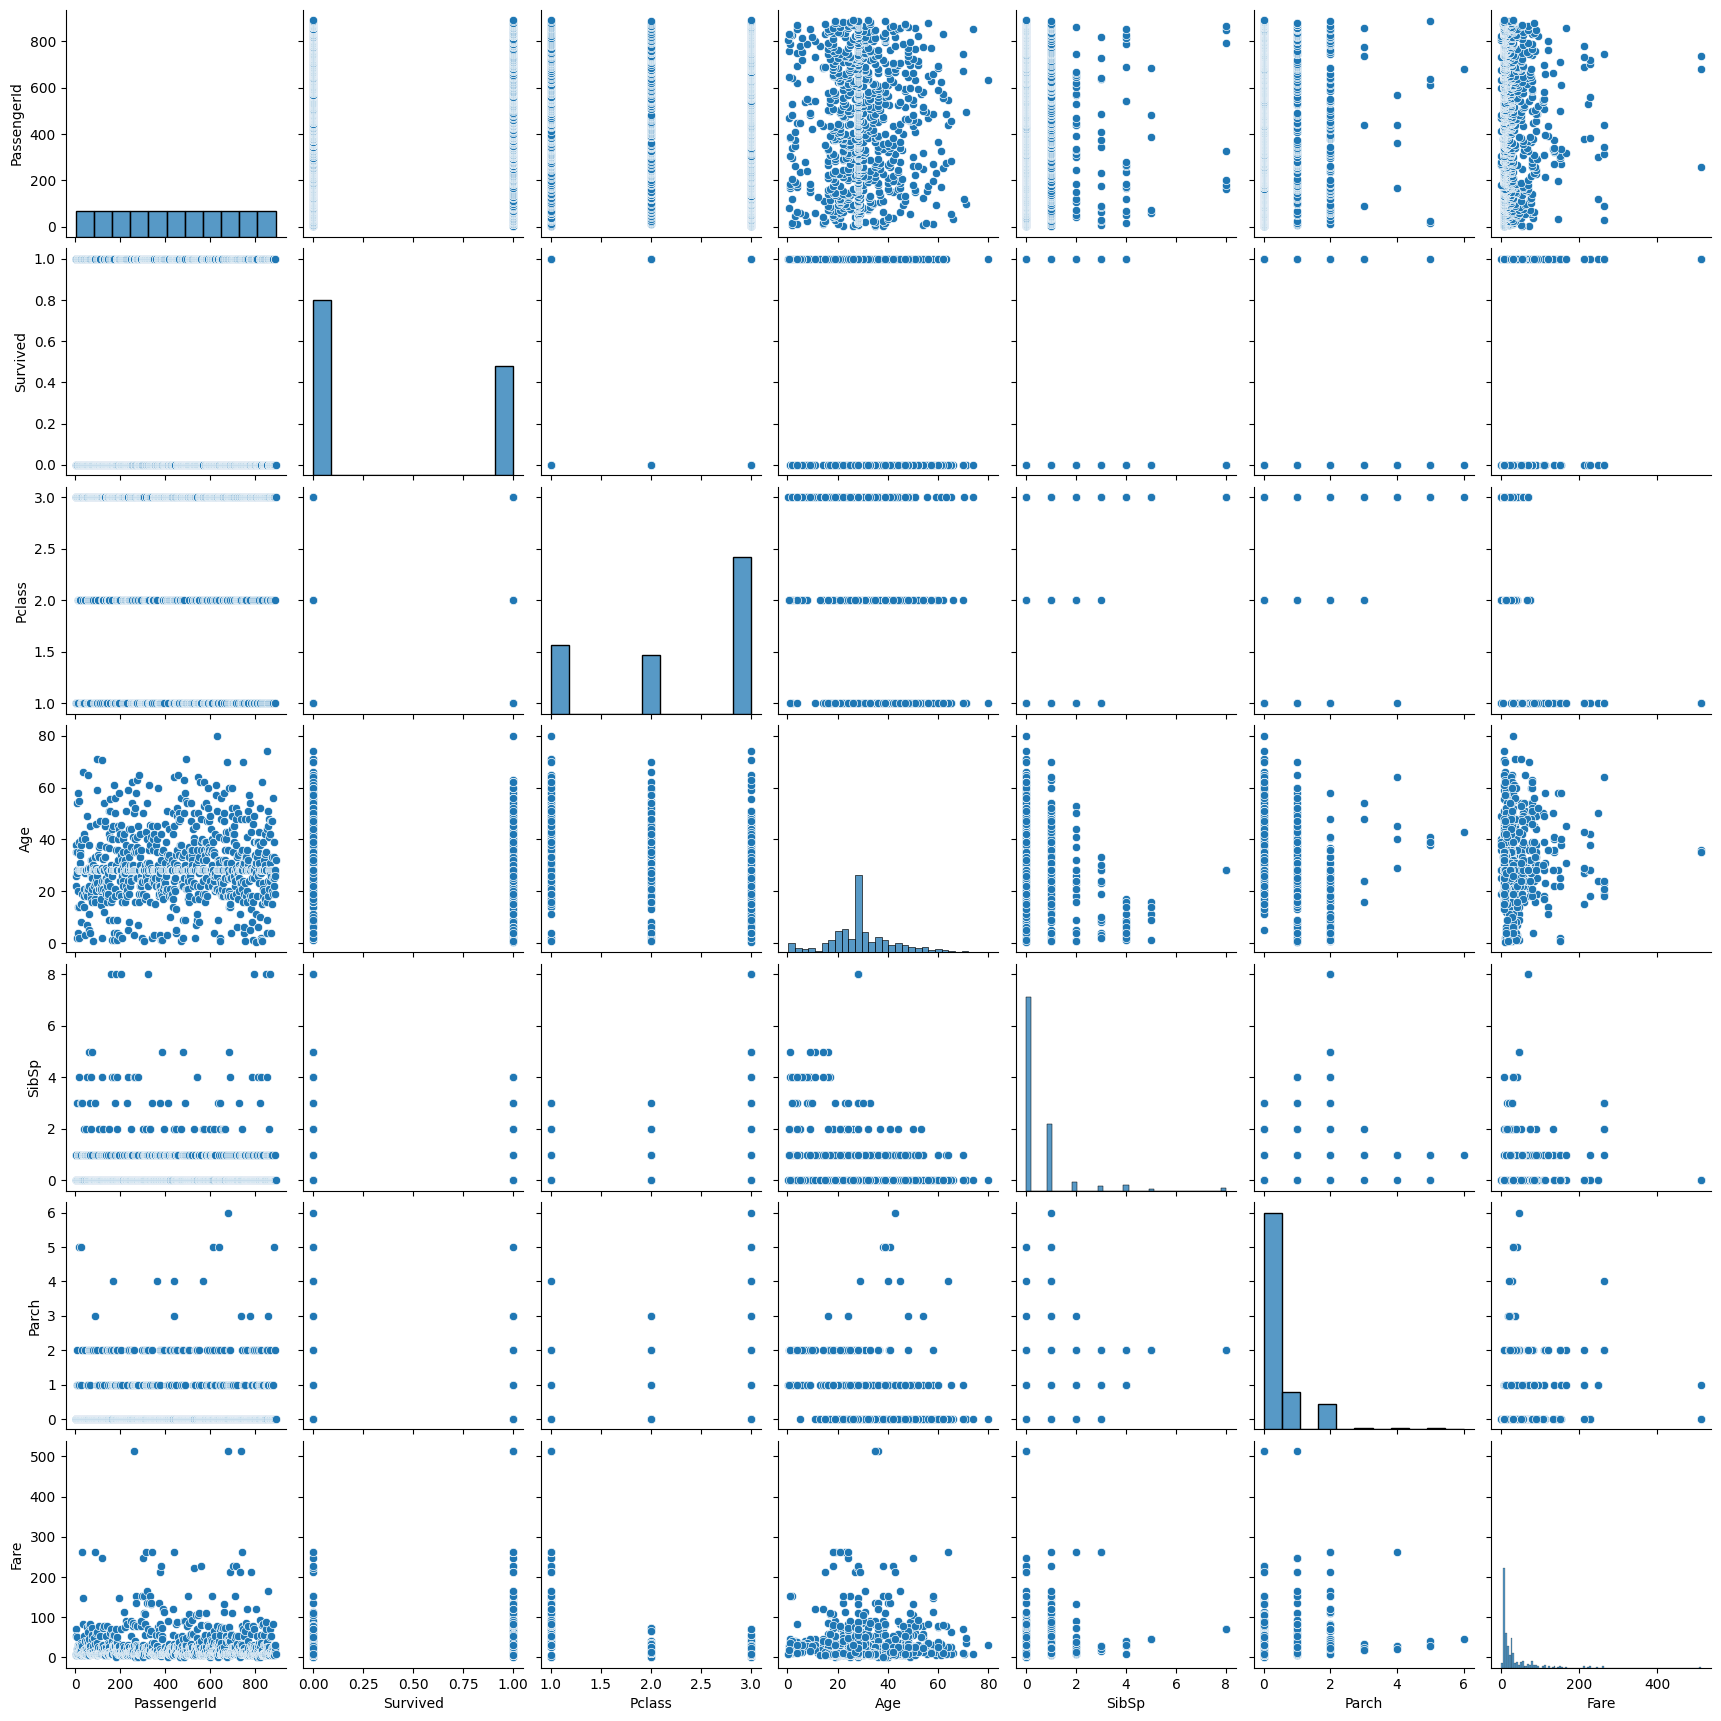

In [15]:
sns.pairplot(df)
plt.show()

C:\Users\mhmou\AppData\Local\Temp\ipykernel_12536\1845787908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


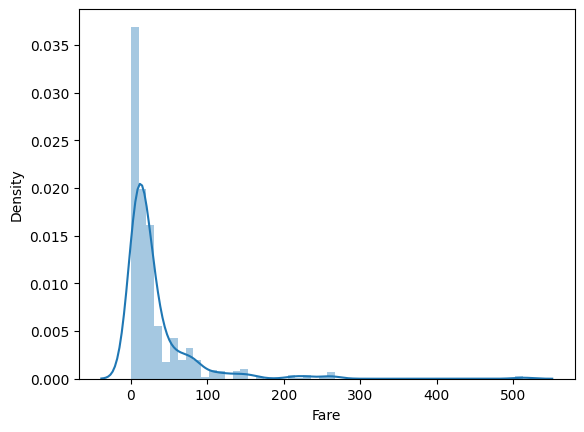

In [16]:
sns.distplot(df['Fare'])
plt.show()

In [17]:
new=df.groupby(['Sex','Survived']).count().reset_index()
surv= new[new['Survived']==1 ]
not_surv=new[new['Survived']==0 ]
surv

,Sex,Survived,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,female,1,233,233,233,233,233,233,233,233,233,233
3,male,1,109,109,109,109,109,109,109,109,109,109


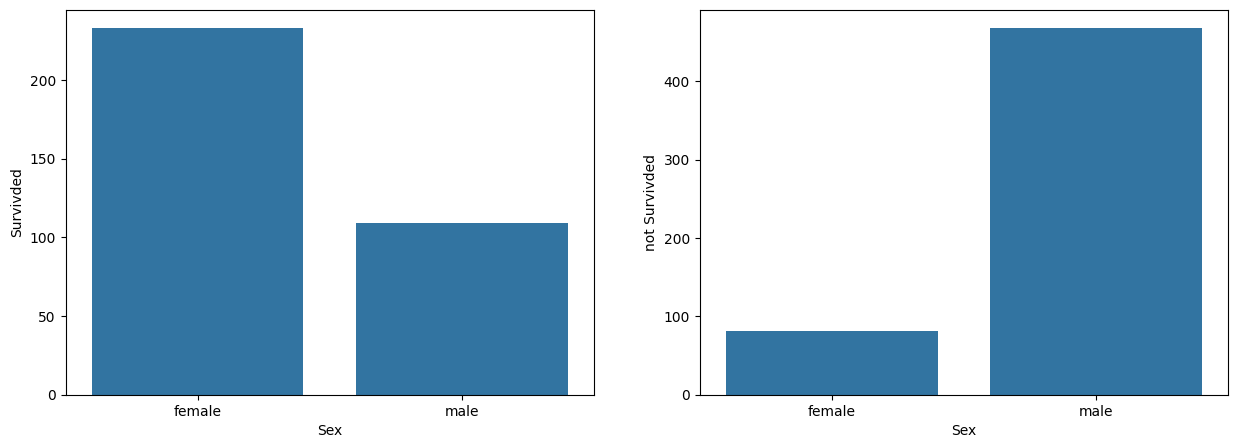

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=surv['Sex'],y=surv['PassengerId'])
plt.ylabel('Survivded')
plt.subplot(1,2,2)
sns.barplot(x=not_surv['Sex'],y=not_surv['PassengerId'])
plt.ylabel('not Survivded')
plt.show()

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,roof,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,roof,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,roof,S


In [20]:
df['Cabin'][df['Cabin']!='roof']='inside'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,roof,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,inside,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,roof,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,inside,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,roof,S


In [21]:
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Cabin'] = LabelEncoder().fit_transform(df['Cabin'])
df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])

train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
train['Cabin'] = LabelEncoder().fit_transform(train['Cabin'])
train['Embarked']=LabelEncoder().fit_transform(train['Embarked'])

test['Sex'] = LabelEncoder().fit_transform(test['Sex'])
test['Cabin'] = LabelEncoder().fit_transform(test['Cabin'])
test['Embarked']=LabelEncoder().fit_transform(test['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,2


In [22]:
df['Embarked'].unique()

array([2, 0, 1], dtype=int64)

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,76,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,76,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,76,2


In [24]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
test.drop(['Name','Ticket','PassengerId','SibSp'],axis=1,inplace=True)

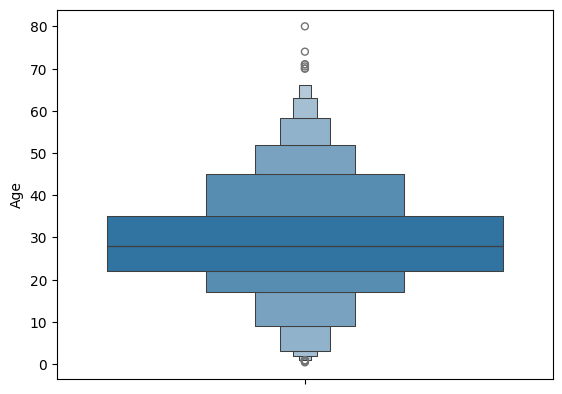

In [25]:

sns.boxenplot(df['Age'])
plt.show()

In [26]:
for i in df.columns :
    print(i)

Survived
Pclass
Sex
Age
SibSp
Parch
Fare
Cabin
Embarked


In [27]:
df.shape

(891, 9)

In [28]:

for i in ['Age','Fare']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[i] >= (Q1 - 1.5 * IQR)) & (df[i] <= (Q3 + 1.5 * IQR))]

In [29]:
df.shape

(718, 9)

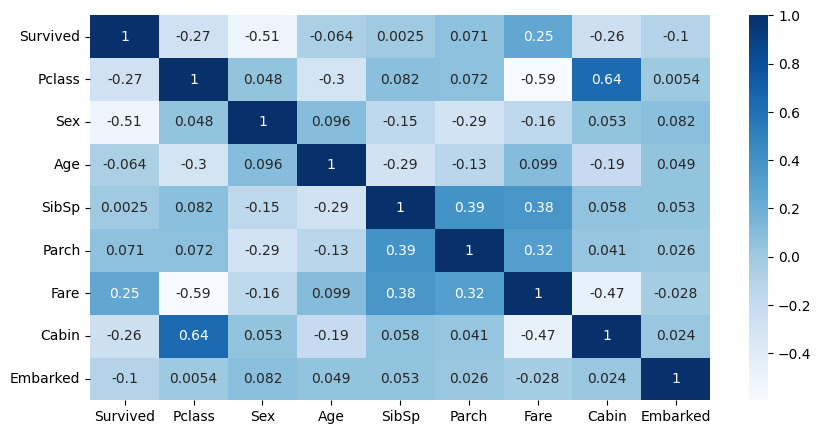

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,1,2
2,1,3,0,26.0,0,0,7.9250,1,2
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,1,2
5,0,3,1,28.0,0,0,8.4583,1,1


In [32]:
df.drop(['SibSp'],axis=1,inplace=True)

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

target= df['Survived']
df.drop('Survived',axis=1,inplace=True)
x_train,x_test,y_train,y_test= train_test_split(df,target,test_size=.3,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

X_train = train[['Sex', 'Pclass', 'Embarked', 'Fare', 'Age']]
y_train = train['Survived']
X_test = test[['Sex', 'Pclass', 'Embarked', 'Fare', 'Age']]
y_test = testtarget['Survived']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

0.9138755980861244


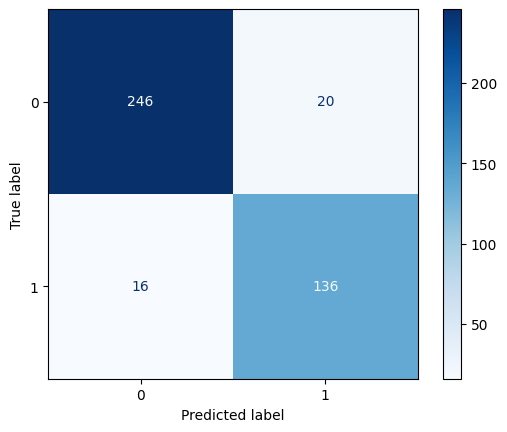

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 7)
knn.fit(X_train_scaled,y_train)
pred2=knn.predict(X_test_scaled)
print(accuracy_score(pred2,y_test))

disp = ConfusionMatrixDisplay.from_predictions(y_test, pred2, cmap='Blues')
plt.show()

0.8947368421052632


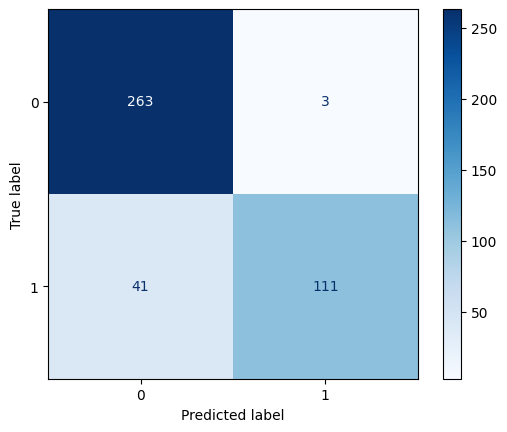

In [39]:
model=SVC()
model.fit(X_train_scaled,y_train)

pred=model.predict(X_test_scaled)
print(accuracy_score(pred,y_test))

disp = ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='Blues')
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
1.0


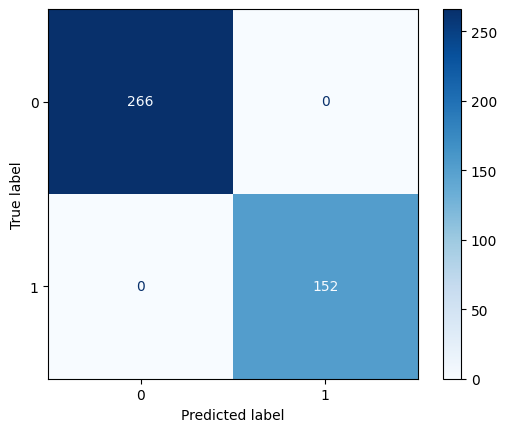

In [47]:
grid={
    'C':[.1,.001,.01],
    'kernel':['linear','rbf', 'sigmoid','poly'],
    'gamma':['scale','auto']
}
model=GridSearchCV(estimator=SVC(),param_grid=grid,verbose=2,return_train_score=True,n_jobs=-1)
model.fit(X_train_scaled,y_train)
print(model.best_params_)

pred=model.predict(X_test_scaled)
print(accuracy_score(pred,y_test))

disp = ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='Blues')
plt.show()
